#### **LAB for CLASSIFICATION MACHINE LEARNING**


<font color='Blue'>*Objective*:</font> Predict the probability of a customer defaulting payment for the credit card the subsequent month, based on past information. The past information is provided in the dataset. This probability will help the collections team to prioritise follow up with customers who have a high propensity of defaulting. The goal of the research is to explore and exhibit the capabilities of various model agnostic interpretability techniques to generate explainable insights into prediction model outcomes

<font color='Blue'>*Input Data*:</font> Cleaned and pre-processed files from Feature engineering session are used as input.
  - x_train.csv, x_test.csv, y_train.csv, y_test.csv <br>
  - Location --> content/04_data_preprocessing_&_feature_engineering/Solution_Classification_preprocessing.ipynb
             

<font color='Blue'>*Outcome Expected*:</font> Build Machine learning Models, Evaluation their performace and compare ML algorithms across various performance metrics.

###                                                  Day 1 - Part_2 LAB

####  Basic Model Implementation

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

#Visuals and Time libraries
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings('ignore')

#Import Data balancing libraries
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Import models from sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

# Import evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Import tuning library from sklearn
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the training & test datasets from Part1- Feature Engineering solution 

x_train=pd.read_csv('../datasets/classification/processed/X_train.csv', index_col=0)
x_test=pd.read_csv('../datasets/classification/processed/X_test.csv', index_col=0)

y_train=pd.read_csv('../datasets/classification/processed/y_train.csv', index_col=0)
y_test=pd.read_csv('../datasets/classification/processed/y_test.csv', index_col=0)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(20659, 19) (8984, 19) (20659, 1) (8984, 1)


#### **Data Balancing**

In [3]:
# Check if the dataset needs Class balancing for Target variable
print("Original unbalanced dataset distribution: ", [y_train.value_counts(), y_train.value_counts(normalize=True)])

Original unbalanced dataset distribution:  [default payment next month
0                             16089
1                              4570
dtype: int64, default payment next month
0                             0.778789
1                             0.221211
dtype: float64]


In [4]:
#importing SMOTETomek to handle class imbalance

balanced_data = SMOTETomek(random_state=42)

# fit predictor and target variable
x_smote, y_smote = balanced_data.fit_resample(x_train, y_train)

In [5]:
# check the distribution of balanced sample
print("Resampled balanced dataset distribution: ", [y_smote.value_counts(), y_smote.value_counts(normalize=True)])

Resampled balanced dataset distribution:  [default payment next month
0                             15462
1                             15462
dtype: int64, default payment next month
0                             0.5
1                             0.5
dtype: float64]


#### **Logistic Regression Model**

In [6]:
# Fit the Logistic Regression Model
start = time.time()

logmodel = LogisticRegression()
logmodel.fit(x_smote,y_smote)

stop = time.time()

# predicting the y test observations
y_pred = logmodel.predict(x_test)
y_train_pred = logmodel.predict(x_smote)

In [7]:
#getting all scores for Logistic Regression
log_acctr = round(accuracy_score(y_train_pred,y_smote), 3)
log_acc = round(accuracy_score(y_pred,y_test), 3)
log_prec = round(precision_score(y_pred,y_test), 3)
log_rec = round(recall_score(y_pred,y_test), 3)
log_f1 = round(f1_score(y_pred,y_test), 3)
log_roc = round(roc_auc_score(y_pred,y_test), 3)

#Feature co-efficients
ft_imp = pd.DataFrame(data={'Attribute': x_smote.columns,'Importance': logmodel.coef_[0]}).sort_values(by='Importance', ascending=False)
log_feat = np.array(ft_imp['Attribute'][:3:])

#Training time calculation
log_time=stop-start

#Overall scores
results = pd.DataFrame([['Logistic Regression', log_acctr, log_acc, log_prec, log_rec, log_f1, log_roc, log_time, log_feat]],
            columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score','ROC', 'Training Time(s)','Important Features'])
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC,Training Time(s),Important Features
0,Logistic Regression,0.629,0.55,0.732,0.294,0.42,0.58,0.310124,"[AGE_median, PAY_0, PAY_2]"


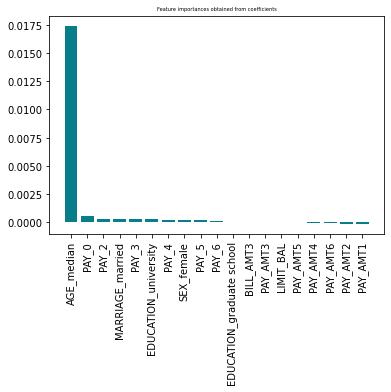

In [8]:
plt.bar(x=ft_imp['Attribute'], height=ft_imp['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=5)
plt.xticks(rotation='vertical')
plt.show()

### Task 1 - **Build a different model, Evaluate the predictions & Compare the results**

In [9]:
# Import the Model from sklearn




In [10]:
# Fit the Model & Predict the outcome using x_smote, y_smote, x_test, y_test





In [11]:
# Evaluate the model predictions using various performance metrics





### Task 2 - **Re-train the model using data from different Balancing technique & Compare the results**

In [12]:
# Import & fit a different balancing technique 




In [13]:
# Use the new x_train and y_train to re-train the model (fit and predict) 






In [14]:
# Evaluate the new model predictions using performance metrics and compare the results






------------------------------------ **END of DAY 1 LAB** ------------------------------------

###                                                  Day 2 - Part_1

####  Ensemble Model Implementation

*NOTE:* Be sure to re-run the above code from the Day 1 lab (the run should take a few seconds) in order to reuse the same input files and have the results available for comparison

#### **Random Forest Classifier**

In [15]:
#fitting data into Random Forest Classifier
start = time.time()
rfc = RandomForestClassifier()
rfc.fit(x_smote,y_smote)
stop = time.time()

# predicting the y test observations
y_pred = rfc.predict(x_test)
y_train_pred = rfc.predict(x_smote)

In [16]:
#getting all scores for Random Forest Classifier
rfc_acctr = round(accuracy_score(y_train_pred,y_smote), 3)
rfc_acc = round(accuracy_score(y_pred,y_test), 3)
rfc_prec = round(precision_score(y_pred,y_test), 3)
rfc_rec = round(recall_score(y_pred,y_test), 3)
rfc_f1 = round(f1_score(y_pred,y_test), 3)
rfc_roc = round(roc_auc_score(y_pred,y_test), 3)

#Feature Importance
imp_ft = pd.DataFrame(data={'Attribute': x_smote.columns, 'Importance': rfc.feature_importances_}).sort_values(by='Importance', ascending=False)
rfc_feat = np.array(imp_ft['Attribute'][:3:])

#Training time calculation

rfc_time=stop-start

results = pd.DataFrame([['Random Forest', rfc_acctr, rfc_acc, rfc_prec, rfc_rec, rfc_f1, rfc_roc, rfc_time, rfc_feat]],
            columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score','ROC', 'Training Time(s)','Important Features'
])
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC,Training Time(s),Important Features
0,Random Forest,0.999,0.803,0.386,0.587,0.466,0.713,5.23768,"[PAY_0, MARRIAGE_married, PAY_2]"


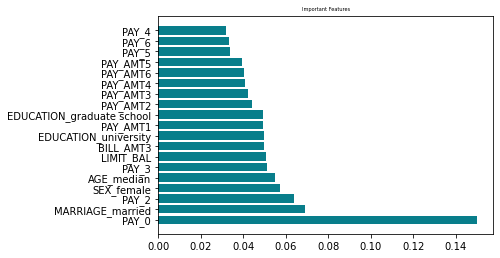

In [17]:
#Plotting feature importance
plt.barh(y=imp_ft['Attribute'], width=imp_ft['Importance'], color='#087E8B')
plt.title('Important Features', size=5)
plt.show()

### Task 3 -  **Build a different Ensemble model, Evaluate the predictions & Compare the results**

In [18]:
# Import a different Model from sklearn




In [19]:
# Fit the Model & Predict the outcome - x_smote, y_smote, x_test, y_test





In [20]:
# Evaluation of model predictions using various performance metrics





###                                                  Day 2 - Part_2 LAB

###  Hyperparameter tuning

#### Random Forest Classifer with tuning
Possible parameters to tune:

1. n_estimators in [10, 100, 1000]
2. max_features in [‘sqrt’, ‘log2’]   or max_features [1 to 20]
3. min_samples_split
4. min_samples_leaf
5. max_depth

In [21]:
# Hyperparameter Grid
param_dict = {'n_estimators' : [10, 50, 100],
               'max_depth' : [2, 3, 5, 10]}

# Create an instance of the RandomForestClassifier
start = time.time()

rfch = RandomForestClassifier()

# Grid search
rfch_grid = GridSearchCV(estimator=rfch,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='roc_auc')
rfch_grid.fit(x_smote, y_smote)

stop = time.time()

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.5s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.4s
[CV] END .......................max_depth=2, n_estimators=50; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=100; total time=   1.1s
[CV] END ......................max_depth=2, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=2, n_estimators=100; total time=   1.1s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=3, n_e

In [22]:
# Displaying the best parameters
print(rfch_grid.best_estimator_)
print(rfch_grid.best_params_)

rfch_optimal_model = rfch_grid.best_estimator_

#class prediction of y on train and test sets
y_pred_rfch_grid = rfch_optimal_model.predict(x_test)
y_train_pred_rfch_grid = rfch_optimal_model.predict(x_smote)

RandomForestClassifier(max_depth=10)
{'max_depth': 10, 'n_estimators': 100}


In [23]:
#getting all scores for Random Forest Classifier
rfch_acctr = round(accuracy_score(y_train_pred_rfch_grid,y_smote), 3)
rfch_acc = round(accuracy_score(y_pred_rfch_grid,y_test), 3)
rfch_prec = round(precision_score(y_pred_rfch_grid,y_test), 3)
rfch_rec = round(recall_score(y_pred_rfch_grid,y_test), 3)
rfch_f1 = round(f1_score(y_pred_rfch_grid,y_test), 3)
rfch_roc = round(roc_auc_score(y_pred_rfch_grid,y_test), 3)

#Feature Importance
imp_ft = pd.DataFrame(data={'Attribute': x_smote.columns, 'Importance': rfch_optimal_model.feature_importances_}).sort_values(by='Importance', ascending=False)
rfc_feat = np.array(imp_ft['Attribute'][:3:])

#Training time calculation
rfch_time=stop-start

results = pd.DataFrame([['Random Forest tuned', rfch_acctr, rfch_acc, rfch_prec, rfch_rec, rfch_f1, rfch_roc, rfch_time, rfc_feat]],
            columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score','ROC', 'Training Time(s)','Important Features'
])
results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC,Training Time(s),Important Features
0,Random Forest tuned,0.89,0.808,0.44,0.593,0.505,0.722,38.521826,"[PAY_0, PAY_2, MARRIAGE_married]"


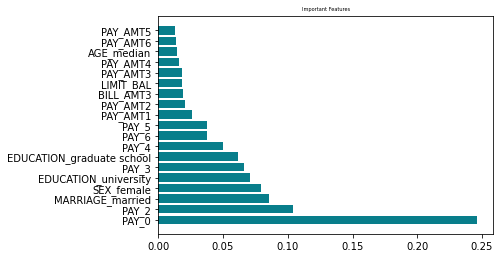

In [24]:
#Plotting feature importance
plt.barh(y=imp_ft['Attribute'], width=imp_ft['Importance'], color='#087E8B')
plt.title('Important Features', size=5)
plt.show()

### Task 4:  **Tune the model from Task3, Evaluate the predictions and Compare the results**


**TIP:** If you encounter warning like this - 
    DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
    
    Please run the below code before training the model
        y_smote = y_smote.values.ravel()
        y_test = y_test.values.ravel()

In [25]:
# Define the hyperparameters and apply Gridsearch to find best parameters




In [26]:
# Fit & Predict the tuned Model





In [27]:
# Evaluation of tuned model





#### Compare the results of all 4 Tasks to see how the performance changes / improves based the following parameters:
    1. Choice/Usage of Class Balancing techniques
    2. Model selection
    3. Hyperparameter tuning